In [2]:
#packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#data

sp500_data = pd.read_csv('sp500_open_close.csv')
print(sp500_data.head(1000))

yelp_data = pd.read_csv('yelp_finalProjectData.csv')
print(yelp_data.head())

cpi_data = pd.read_csv('CPIAUCSL_Data.csv')
print(cpi_data.head())

                          Date         Open        Close
0    2012-01-03 00:00:00-05:00  1258.859985  1277.060059
1    2012-01-04 00:00:00-05:00  1277.030029  1277.300049
2    2012-01-05 00:00:00-05:00  1277.300049  1281.060059
3    2012-01-06 00:00:00-05:00  1280.930054  1277.810059
4    2012-01-09 00:00:00-05:00  1277.829956  1280.699951
..                         ...          ...          ...
995  2015-12-16 00:00:00-05:00  2046.500000  2073.070068
996  2015-12-17 00:00:00-05:00  2073.760010  2041.890015
997  2015-12-18 00:00:00-05:00  2040.810059  2005.550049
998  2015-12-21 00:00:00-05:00  2010.270020  2021.150024
999  2015-12-22 00:00:00-05:00  2023.150024  2038.969971

[1000 rows x 3 columns]
              business_id category_name        date  stars          city
0  MTSW4McQd7CbVtyjqoe9mw  Coffee & Tea  2014-05-26      4  Philadelphia
1  WKMJwqnfZKsAae75RMP6jA  Coffee & Tea  2013-05-28      4      Edmonton
2  WKMJwqnfZKsAae75RMP6jA  Coffee & Tea  2012-11-06      3      Edmonton

In [4]:
#sp500_data cleaning
sp500_data['Date'] = sp500_data['Date'].str[:10]
#rename sp500_data["Date"]
sp500_data.rename(columns={'Date': 'date'}, inplace=True)
#sp500_data['Date'] = pd.to_datetime(sp500_data['Date'])

print(sp500_data.count())

date     3240
Open     3240
Close    3240
dtype: int64


In [5]:
#cpi_data cleaning
#make date just the first 4 characters

cpi_data['Date']=cpi_data['Date'].str[0:4]+'-'+cpi_data['Date'].str[8:10]+'-'+cpi_data['Date'].str[5:7]
cpi_data.rename(columns={'Date': 'date'}, inplace=True)
cpi_data

,date,CPI
0,2012-01-01,227.842
1,2012-01-02,228.329
2,2012-01-03,228.807
3,2012-01-04,229.187
4,2012-01-05,228.713
...,...,...
149,2024-01-06,313.049
150,2024-01-07,313.534
151,2024-01-08,314.121
152,2024-01-09,314.686


In [6]:
#checking for balance
balance_table = yelp_data.groupby('city').count()
balance_table['observations'] = yelp_data['city'].value_counts()
balance_table

,business_id,category_name,date,stars,observations
city,,,,,
Bala Cynwyd,2,2,2,2,2
Boise,16,16,16,16,16
Brandon,4,4,4,4,4
Bristol,1,1,1,1,1
Cherry Hill,1,1,1,1,1
Clearwater,17,17,17,17,17
Collegeville,1,1,1,1,1
Doylestown,1,1,1,1,1
Dunedin,18,18,18,18,18


In [7]:
#remove anything below 10 observations
yelp_data = yelp_data.groupby('city').filter(lambda x: len(x) > 10)
yelp_data['city'].unique()

array(['Philadelphia', 'Edmonton', 'Nashville', 'Santa Barbara', 'Tampa',
       'Newtown', 'New Orleans', 'Boise', 'Moorestown', 'Indianapolis',
       'Clearwater', 'Maplewood', 'Reno', 'Tucson', 'Saint Louis',
       'Dunedin'], dtype=object)

In [8]:
#check for balance on average stars
balance_table = yelp_data.groupby('city')['stars'].mean()
balance_table['observations'] = yelp_data['city'].value_counts()
balance_table

,stars
city,
Boise,4.5
Clearwater,4.764706
Dunedin,4.388889
Edmonton,4.0
Indianapolis,4.514286
Maplewood,3.619048
Moorestown,4.533333
Nashville,4.0
New Orleans,4.402439


In [9]:
#join yelp_data with sp500_data on date
yelp_sp500_data = yelp_data.merge(sp500_data, how = 'left', on = 'date')
yelp_cpi_data = yelp_data.merge(cpi_data, how = 'left', on = 'date')
print(yelp_sp500_data.head())
print(yelp_cpi_data.head())

              business_id category_name        date  stars          city  \
0  MTSW4McQd7CbVtyjqoe9mw  Coffee & Tea  2014-05-26      4  Philadelphia   
1  WKMJwqnfZKsAae75RMP6jA  Coffee & Tea  2013-05-28      4      Edmonton   
2  WKMJwqnfZKsAae75RMP6jA  Coffee & Tea  2012-11-06      3      Edmonton   
3  lk9IwjZXqUMqqOhM774DtQ  Coffee & Tea  2017-12-29      1     Nashville   
4  ppFCk9aQkM338Rgwpl2F5A  Coffee & Tea  2015-10-23      1  Philadelphia   

          Open        Close  
0          NaN          NaN  
1  1652.630005  1660.060059  
2  1417.260010  1428.390015  
3  2689.149902  2673.610107  
4  2058.189941  2075.149902  
              business_id category_name        date  stars          city  CPI
0  MTSW4McQd7CbVtyjqoe9mw  Coffee & Tea  2014-05-26      4  Philadelphia  NaN
1  WKMJwqnfZKsAae75RMP6jA  Coffee & Tea  2013-05-28      4      Edmonton  NaN
2  WKMJwqnfZKsAae75RMP6jA  Coffee & Tea  2012-11-06      3      Edmonton  NaN
3  lk9IwjZXqUMqqOhM774DtQ  Coffee & Tea  2017-12-29

In [10]:
#yelp_sp500_data ordered by date
yelp_sp500_data = yelp_sp500_data.sort_values(by=['date'])
yelp_sp500_data

,business_id,category_name,date,stars,city,Open,Close
199,p24n1vScP_MHxJVPrao-jA,Coffee & Tea,2005-05-11,4,Saint Louis,NaN,NaN
277,dD2p903p8lU0IgXT3OFluA,Coffee & Tea,2008-05-01,4,Nashville,NaN,NaN
801,p24n1vScP_MHxJVPrao-jA,Coffee & Tea,2008-05-20,5,Saint Louis,NaN,NaN
816,71q2UD1A7KL2q4AA8mPobQ,Coffee & Tea,2008-09-01,5,Saint Louis,NaN,NaN
579,1feuZITxuTrl9mr7V11kwQ,Coffee & Tea,2008-12-08,5,Tucson,NaN,NaN
...,...,...,...,...,...,...,...
443,DZdE09qqCcX7Atf3Df7Yqg,Coffee & Tea,2018-09-25,1,Nashville,2921.750000,2915.560059
833,9_m_iA3VAqGBJEW5XLc-5w,Coffee & Tea,2018-09-27,5,Indianapolis,2911.649902,2914.000000
720,EQ-TZ2eeD_E0BHuvoaeG5Q,Coffee & Tea,2018-09-27,2,Indianapolis,2911.649902,2914.000000
865,4FaYG9qKDpDyr68bKmaIEw,Coffee & Tea,2018-09-29,4,Boise,NaN,NaN


In [11]:
#remove data with null values
yelp_sp500_data = yelp_sp500_data.dropna()
print(yelp_sp500_data.count())
yelp_cpi_data = yelp_cpi_data.dropna()
print(yelp_cpi_data.count())

business_id      529
category_name    529
date             529
stars            529
city             529
Open             529
Close            529
dtype: int64
business_id      23
category_name    23
date             23
stars            23
city             23
CPI              23
dtype: int64


In [12]:
#view cleaned data
yelp_sp500_data

,business_id,category_name,date,stars,city,Open,Close
59,0zH0l4Jbf-oove3cLvrFOg,Coffee & Tea,2012-01-03,3,Newtown,1258.859985,1277.060059
64,ZyyExneJPXjci7yc2CGAPQ,Coffee & Tea,2012-01-03,4,Philadelphia,1258.859985,1277.060059
488,oaboaRBUgGjbo2kfUIKDLQ,Coffee & Tea,2012-01-04,5,Nashville,1277.030029,1277.300049
288,9sdu-m075T6qdB46wXP46w,Coffee & Tea,2012-01-04,4,Nashville,1277.030029,1277.300049
254,oaboaRBUgGjbo2kfUIKDLQ,Coffee & Tea,2012-03-01,5,Nashville,1365.900024,1374.089966
...,...,...,...,...,...,...,...
230,GOSVLhjUT6TnrPhkkmDOpw,Coffee & Tea,2018-09-25,5,Philadelphia,2921.750000,2915.560059
443,DZdE09qqCcX7Atf3Df7Yqg,Coffee & Tea,2018-09-25,1,Nashville,2921.750000,2915.560059
833,9_m_iA3VAqGBJEW5XLc-5w,Coffee & Tea,2018-09-27,5,Indianapolis,2911.649902,2914.000000
720,EQ-TZ2eeD_E0BHuvoaeG5Q,Coffee & Tea,2018-09-27,2,Indianapolis,2911.649902,2914.000000


In [13]:
#view cpi_data
yelp_cpi_data.head()

,business_id,category_name,date,stars,city,CPI
6,IDtLPgUrqorrpqSLdfMhZQ,Coffee & Tea,2018-01-09,5,Santa Barbara,252.182
59,0zH0l4Jbf-oove3cLvrFOg,Coffee & Tea,2012-01-03,3,Newtown,228.807
64,ZyyExneJPXjci7yc2CGAPQ,Coffee & Tea,2012-01-03,4,Philadelphia,228.807
93,CPFKi2lZJazP6IdtCdDDyg,Coffee & Tea,2016-01-04,5,Reno,238.992
116,EQ-TZ2eeD_E0BHuvoaeG5Q,Coffee & Tea,2018-01-10,5,Indianapolis,252.772


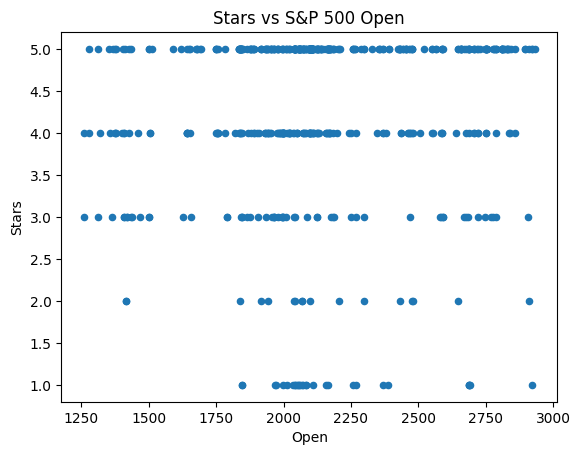

In [15]:
#how does stars relate to the open
yelp_sp500_data.plot(x='Open', y='stars', kind='scatter')
plt.title('Stars vs S&P 500 Open')
plt.xlabel('Open')
plt.ylabel('Stars')
plt.show()

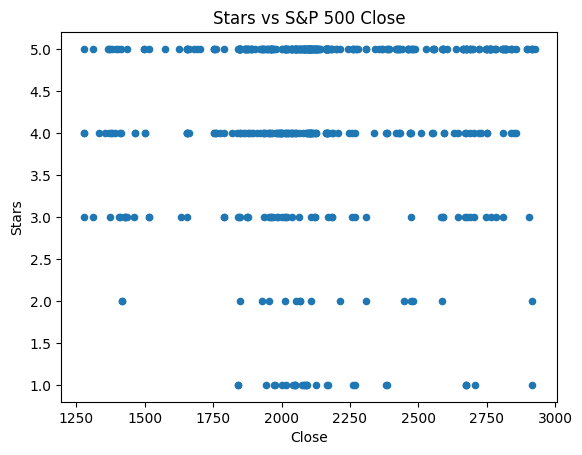

In [16]:
#how does stars relate to the close
yelp_sp500_data.plot(x='Close', y='stars', kind='scatter')
plt.title('Stars vs S&P 500 Close')
plt.xlabel('Close')
plt.ylabel('Stars')
plt.show()

In [23]:
#correlation between stars and open and close
yelp_sp500_data_corr = yelp_sp500_data[['stars', 'Open','Close']]
yelp_sp500_data_corr.corr()

,stars,Open,Close
stars,1.000000,0.068090,0.067435
Open,0.068090,1.000000,0.999271
Close,0.067435,0.999271,1.000000


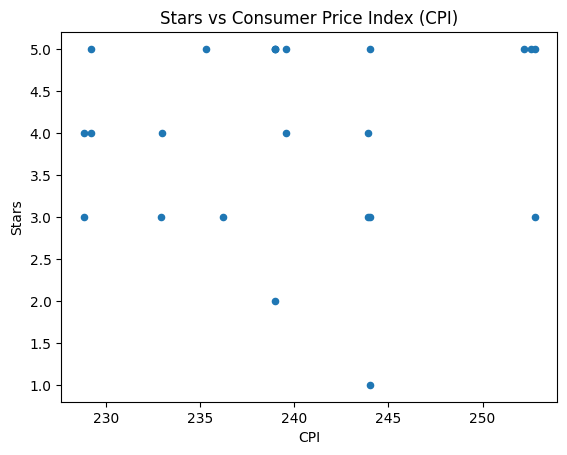

In [17]:
#how does stars relate to the cpi
yelp_cpi_data.plot(x='CPI', y='stars', kind='scatter')
plt.title('Stars vs Consumer Price Index (CPI)')
plt.xlabel('CPI')
plt.ylabel('Stars')
plt.show()

In [18]:
#correlation between stars and cpi
yelp_cpi_data_corr = yelp_cpi_data[['stars', 'CPI']]
yelp_cpi_data_corr.corr()

,stars,CPI
stars,1.000000,0.070666
CPI,0.070666,1.000000
